In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy_financial as npf
from scipy.optimize import root_scalar

A government bond is priced at 105%. 
Is the yield to maturity higher or lower than the coupon rate?

# 3.2 Self-Test
A one-year U.S. Treasury bond has a coupon rate of 10%.  
a. What are the cash flows on this bond?  
b. The bond’s yield to maturity is 6%. What is the present value of the bond?  
c. If the yield to maturity is 6%, what return do you earn every 6 months? d. What is the bond’s effective annual rate of return?

In [31]:
#Usually the U.S Treasury bonds coupons are payed twice a year, semiannualy
t = 1  #years to mature
n = 2  #periods of payment
F = 1000  #face value
C = 0.10*F/2  #coupon value
y = 0.06

print("The cashflow is: $", C ," and $",C + F )

def pv_bond(C,F,y,n):
    pv = 0
    CF = 0
    for i in np.arange(1,t*n + 1):
        if i< (t*n):
            CF = C*(1/(1+y/n))**i
        else:
             CF = (C+F)*(1/(1+y/n))**i#last cashflow
        
        pv += CF
    
    return pv

pv_treasury_bond = pv_bond(C,F,y,n)

print("The present value of the treasury bond is: $", f"{pv_treasury_bond:,.2f}")
print("The return i earn every 6 months is ", (y/2)*100 , "%")
print("The bond effective annual rate of return is", f"{((1+y/2)**n -1)*100:,.2f}","%")

The cashflow is: $ 50.0  and $ 1050.0
The present value of the treasury bond is: $ 1,038.27
The return i earn every 6 months is  3.0 %
The bond effective annual rate of return is 6.09 %


# 3.3 Self-Test
a. Which does not change during the bond’s life—the coupon or the yield?  
b. If the yield rises, does the bond price rise or fall?

a. The coupon does not change during the bond's life.  
b. If the yield rises the price bond falls.

# 3.4 Self-Test
If yields decline, which bond is likely to appreciate the most:  
a. A 20-year 8% bond or a 5-year 8% bond?  
b. A 20-year 8% bond or a 20-year 2% bond?  

a. The 20-year 8% bond has a larger duration so the yield decline has a larger effect on the price

b. The 20-year 2% bond has a larger duration so is likely to appreciate the most.

# 3.5 Self-Test  
Suppose that you used the 3.66% yield, calculated earlier, to value a two-year 5% bond.  
a. Would you get the correct answer? If not, why not?  
b. Do you think that you would over- or under-value the bond?  

a.- No, you won’t get the correct value, because proper valuation requires discounting each cash flow at its spot rate.  
b.- If the curve is normal (upward sloping, as is typical), you would overvalue the bond.

# 3.6 Self-Test
Suppose that the 20-year discount factor is 0.3769. What is the 20-year spot rate, r20?


In [4]:
DF_20 = 0.3769

r20 = (1/DF_20)**(1/20) - 1

print(f"The 20-year spot rate, r20 is : {r20:,.2f}")

The 20-year spot rate, r20 is : 0.05


# 1. Bond prices and yields (S3.1) 
A 10-year bond is issued with a face value of \\$1,000, paying interest of \\$60 a year. If interest rates increase shortly after the bond is issued, what happens
to the bond’s  
a. Coupon rate?  
b. Price?  
c. Yield to maturity?  

In [2]:
#a. The coupon rate stayes the same
#b. The price of the bond goes down 
#c. The yield to maturity goes up 

1000.0


# 2. Bond prices and yields (S3.1)
The following statements are true. Explain why.  
a. If a bond’s coupon rate is higher than its yield to maturity, then the bond will sell for more
than face value.  
b. If a bond’s coupon rate is lower than its yield to maturity, then the bond’s price will
increase over its remaining maturity.  

In [4]:
#a. TRUE - If the coupon rate is higher than the yield to maturity, then the bond will sell for more than the face value 
#because investors are paying to receive larger coupon payments compared to the lower yield in the market. 

#b. FALSE - If a bond's coupon rate is lower than its yield to maturity, then the bond's price will increase over it ISN'T remaining 
#maturity because the bond just increases toward par value becasuse i'll be paid back that amount at maturity and no more than that

# 3. Bond prices and yields (S3.1) 
Construct some simple examples to illustrate your answers to the following:  
a. If interest rates rise, do bond prices rise or fall?  
b. If the bond yield to maturity is greater than the coupon, is the price of the bond greater or
less than 100?  
c. If the price of a bond exceeds 100, is the yield to maturity greater or less than the coupon?  
d. Do high-coupon bonds sell at higher or lower prices than low-coupon bonds?  
e. If interest rates change, do the prices of high-coupon bonds change proportionately more
than that of low-coupon bonds?  

a. If the interest rates rises then the bond price fall 
b. If the yield to maturity is greater than the coupon then the bond price is at discount so it is less than 100% of the face value
c. If the price of a bond exceeds a 100 then the yield to maturity is less than the coupon
d. High-coupon bonds sell at higher prices than low-coupon bonds
e. Yes. the prices of high-coupon bonds change proportionately more than that of low-coupon bonds


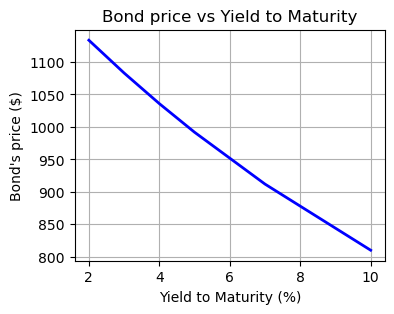

In [35]:
face_value = 1000 #(1 , 1)
ytm = np.array([0.02,0.03,0.04, 0.05,0.07,0.1]) #(4, 1)
i = np.arange(1,len(ytm)+1) #(4, 1)
coupon_rate = 0.05
maturity_years = 3

#suma vectorizada
pv_coupons = np.sum(coupon_rate*face_value*(1/(1+ytm)**i))

pv_facevalue = face_value*(1/(1+ytm)**i[-1])

present_value_bond = pv_coupons + pv_facevalue

plt.figure(figsize=(4,3))
plt.plot(ytm*100, present_value_bond, color ='blue',lw=2)
plt.xlabel("Yield to Maturity (%)")
plt.ylabel("Bond's price ($)")
plt.title("Bond price vs Yield to Maturity")
plt.grid(True)


print("a. If the interest rates rises then the bond price fall ")
print("b. If the yield to maturity is greater than the coupon then the bond price sells at discount (less than 100% of the face value)")
print("c. If the price of a bond exceeds a 100%, then the yield to maturity is less than the coupon rate")
print("d. Given the same maturity and YTM, high-coupon bonds are priced above low-coupon bonds")
print("e. No. The prices of low-coupon bonds change proportionately more than those of high-coupon bonds.")

# 4. Bond prices and yields (S3.1) 
A 10-year German government bond (bund) has a face value of €100 and a coupon rate of 5% paid annually. Assume that the interest rate (in euros) is
equal to 6% per year. What is the bond’s PV?


In [54]:
face_value = 100
coupon_rate = 0.05
coupon_frequency = 1
yield_to_maturity = 0.06
maturity_years = 10
#market_price = 


############################# manual formula ##############################################
#cashflows
coupon = face_value*coupon_rate
i = np.arange(1,maturity_years + 1)  #array for years of maturity
discount_factors = 1 / (1 + yield_to_maturity) ** i #discount factors

#PV odf the coupons + PV face value
pv_coupons = np.sum(coupon*discount_factors)
pv_facevalue =  face_value*(discount_factors[-1])
pv_10year_bond = pv_coupons + pv_facevalue

print(f"The bond's PV is : €{pv_10year_bond:,.2f}")


############################ closed form formula###########################################

#pv of the annuity of coupons
pv_coupons_closed = coupon*(1/ytm - 1/(ytm*(ytm+1)**maturity_years))
pv_facevalue_closed = face_value*(1/(1+ytm)**maturity_years)
pv_10year_bond_closed = pv_coupons_closed + pv_facevalue_closed

print(f"(closed-form formula)The bond's PV is : €{pv_10year_bond:,.2f}")

The bond's PV is : €92.64
(closed-form formula)The bond's PV is : €92.64


# 5. Bond prices and yields (S3.1)
In December 2020, Treasury $4 \tfrac{1}{4}\%$  of 2040 offered a semiannually compounded yield to maturity of 1.32%. Recognizing that coupons are paid semiannually, calculate the bond’s price.

In [5]:
coupon_rate = 0.0425
coupon_frequency = 2
yield_to_maturity = 0.0132
maturity_years = 20
face_value = 100

########################### manual form ############################

coupon_per_period = coupon_rate * face_value/coupon_frequency
i = np.arange(1 , maturity_years*coupon_frequency + 1)
discount_factors = 1/( 1 + yield_to_maturity/coupon_frequency)**i

#pv of the stream of coupons + pv facevalue
pv_coupons = np.sum(coupon_per_period*discount_factors)
pv_facevalue = face_value*(1/(1+ yield_to_maturity/coupon_frequency)**(maturity_years*coupon_frequency))
pv_bond = pv_coupons + pv_facevalue
print(f"The bond's price is ${pv_bond:,.2f}")

########################### closed form ############################
ytm_adjusted = yield_to_maturity/coupon_frequency
maturity_years_adjusted = maturity_years*coupon_frequency
#pv of the stream of coupons + pv facevalue
pv_coupons_closed = (coupon_per_period/(ytm_adjusted))*(1 - 1/((1 + ytm_adjusted )**maturity_years_adjusted))
pv_facevalue_closed = face_value*(1/(1+ ytm_adjusted)**(maturity_years_adjusted))
pv_bond_closed = pv_facevalue_closed + pv_coupons_closed

print(f"The bond's price is ${pv_bond_closed:,.2f}")


The bond's price is $151.35
The bond's price is $151.35


# 6. Bond prices and yields (S3.1) 
A 10-year U.S. Treasury bond with a face value of $1,000 pays a coupon of 5.5% (2.75% of face value every six months). The reported yield to maturity is
5.2% (a six-month discount rate of 5.2/2 = 2.6%).  
a. What is the present value of the bond?  
b. Generate a graph or table showing how the bond’s present value changes for semiannually
compounded interest rates between 1% and 15%.  

The bond's present value is $1,023.16
The bond's present value is $1,023.16
 YTM (%)  Bond Price ($)
       1         1427.22
       2         1315.80
       3         1214.61
       4         1122.64
       5         1038.97
       6          962.81
       7          893.41
       8          830.12
       9          772.36
      10          719.60
      11          671.36
      12          627.23
      13          586.81
      14          549.75
      15          515.76


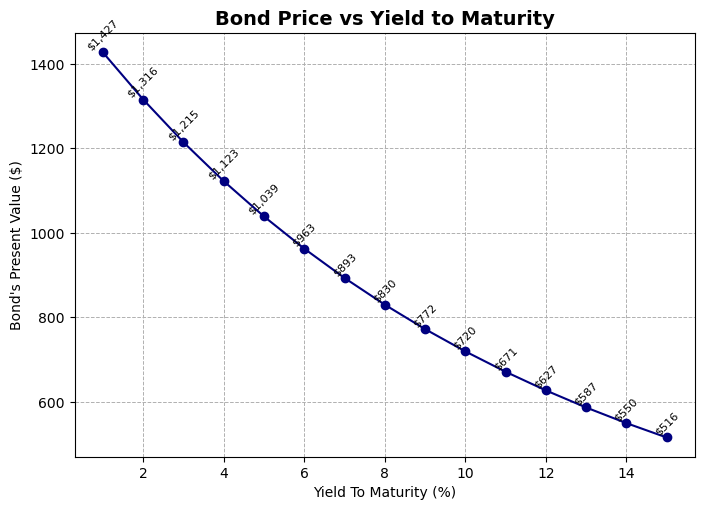

In [95]:
maturity_years = 10
coupon_rate = 0.055
frequency_coupon = 2
yield_to_maturity = 0.052
face_value = 1000
coupon = coupon_rate*face_value

#coupon rate is greater than the yield to maturity so it's a premium bond

########################### manual form ############################
#present value of the bond
ytm_per_period = yield_to_maturity/frequency_coupon
coupon_per_period =  coupon/frequency_coupon
i = np.arange(1,frequency_coupon*maturity_years + 1)
discount_factor = 1/(1+ytm_per_period)**i

pv_coupons = np.sum(coupon_per_period*(discount_factor))
pv_face_value = face_value*(1/(1+ytm_per_period)**i[-1])
pv_bond = pv_coupons + pv_face_value

print(f"The bond's present value is ${pv_bond:,.2f}" )

########################### closed form ############################
pv_coupons_closed = (coupon_per_period/ytm_per_period)*(1 - 1/(1 + ytm_per_period)**i[-1])
pv_face_value_closed = face_value*(1/(1 + ytm_per_period)**i[-1])
pv_bond_closed = pv_coupons_closed + pv_face_value_closed

print(f"The bond's present value is ${pv_bond_closed:,.2f}" )


#rates graph

rates = np.arange(1, 16)/100
#cashflows per period without faced value
cashflows =  np.array([coupon_rate*face_value/frequency_coupon]*(maturity_years*frequency_coupon))
#cashflows per period with face value
cashflows[-1] += face_value


pvs_bond = np.array([])
pv_bond = 0
for j in rates:
    discounted_factors = 1/((1+j/frequency_coupon)**i)
    pv_bond = np.sum(cashflows*discounted_factors)
    pvs_bond = np.append(pvs_bond,pv_bond)

# Crear DataFrame
df = pd.DataFrame({
    "YTM (%)": (rates * 100).astype(int),
    "Bond Price ($)": np.round(pvs_bond, 2)
})

print(df.to_string(index=False))

#printing the rates vs the bonds prices
np.set_printoptions(precision=2) 
    
plt.figure(figsize=(8,5.5))
plt.plot(rates*100, pvs_bond,  marker='o', linestyle='-', color='navy')
plt.xlabel("Yield To Maturity (%)")
plt.ylabel("Bond's Present Value ($)")
plt.title("Bond Price vs Yield to Maturity", fontsize=14, fontweight="bold")

for x, y in zip(rates * 100, pvs_bond):
    plt.text(x, y, f"${y:,.0f}", ha='center', va='bottom', fontsize=8, rotation=45)
             
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

# 7. Bond prices and yields (S3.1)
Choose 10 U.S. Treasury bonds with different coupons and different maturities. Calculate how their prices would change if their yields to maturity
increased by 1 percentage point. Are long- or short-term bonds most affected by the change in yields? Are high- or low-coupon bonds most affected? (For simplicity, assume annual coupon payments.)

#	Cupón estimado	Vencimiento
1	alto (por ejemplo ≈ 5-6 %)	1 año  
2	bajo (≈ 1-2 %)	1 año  
3	medio (≈ 3-4 %)	5 años  
4	alto (≈ 5-6 %)	5 años  
5	bajo (≈ 1-2 %)	10 años  
6	medio	10 años  
7	alto	20 años  
8	bajo	20 años  
9	medio	30 años  
10	alto o bajo extremos (muy bajo o muy alto)	30 años  

In [114]:
# Datos
maturity_years = np.array([1, 1, 5, 5, 10, 10, 20, 20, 30, 30])
coupon_rates   = np.array([0.05, 0.01, 0.03, 0.05, 0.01, 0.04, 0.06, 0.01, 0.03, 0.005])
face_value     = 1000
ytm            = 0.04
shock          = 0.01

# Función de precio de bono (asumiendo pagos anuales)
def bond_price(coupon_rates, face_value, maturity_years, ytm):
    # Valor presente de los cupones
    pv_coupons = (coupon_rates * face_value) / ytm * (1 - (1 + ytm) ** (-maturity_years))
    # Valor presente del principal
    pv_face = face_value * (1 + ytm) ** (-maturity_years)
    return pv_coupons + pv_face

# Precios vectorizados
pv_base = bond_price(coupon_rates, face_value, maturity_years, ytm)
pv_up   = bond_price(coupon_rates, face_value, maturity_years, ytm + shock)

# Diferencia
price_change = pv_up - pv_base

# DataFrame
df = pd.DataFrame({
    "Coupon rate (%)": coupon_rates * 100,
    "Maturity (yrs)": maturity_years,
    "Price @4% ($)": np.round(pv_base, 2),
    "Price @5% ($)": np.round(pv_up, 2),
    "Δ Price ($)": np.round(price_change, 2)
})

print(df.to_string(index=False))

 Coupon rate (%)  Maturity (yrs)  Price @4% ($)  Price @5% ($)  Δ Price ($)
             5.0               1        1009.62        1000.00        -9.62
             1.0               1         971.15         961.90        -9.25
             3.0               5         955.48         913.41       -42.07
             5.0               5        1044.52        1000.00       -44.52
             1.0              10         756.67         691.13       -65.54
             4.0              10        1000.00         922.78       -77.22
             6.0              20        1271.81        1124.62      -147.18
             1.0              20         592.29         501.51       -90.78
             3.0              30         827.08         692.55      -134.53
             0.5              30         394.78         308.24       -86.54


# Recordatorio - Es mejor usar vectorización que bucles clásicos e incluso que list comprehensions

In [116]:
import time
import numpy as np

N = 1_000_000

# 1️⃣ Bucle clásico
start = time.time()
result_loop = []
for x in range(N):
    result_loop.append(x**2)
print("Bucle clásico:", time.time() - start, "segundos")

# 2️⃣ List comprehension
start = time.time()
result_listcomp = [x**2 for x in range(N)]
print("List comprehension:", time.time() - start, "segundos")

# 3️⃣ Vectorización con NumPy
start = time.time()
arr = np.arange(N)
result_numpy = arr**2
print("Vectorización NumPy:", time.time() - start, "segundos")


Bucle clásico: 0.3228490352630615 segundos
List comprehension: 0.3179183006286621 segundos
Vectorización NumPy: 0.00276947021484375 segundos


# 8. Bond returns (S3.1) 
If a bond’s yield to maturity does not change, the return on the bond each year will be equal to the yield to maturity. Confirm this with a simple example  of  a  four-year bond selling at a premium to face value. Now do the same for a four-year bond selling at a discount. For convenience, assume annual coupon payments.

In [15]:
# Parámetros
face_value = 1000
coupon_rate = 0.08
ytm = 0.04
maturity_years = 4

# Flujos de caja (años 1..4)
years = np.arange(1, maturity_years + 1)
cashflows = np.full(maturity_years, face_value * coupon_rate)
cashflows[-1] += face_value  # último incluye principal

# Precios en t=0..3
t = np.arange(maturity_years)[:, None]        # 0,1,2,3  shape(4 , 1) # Momento en el que se hace la valoración del bono
k = np.arange(1, maturity_years+1)            # 1..4     shape(4,)    # Año en el que ocurre el flujo
mask = k > t
discounts = (1+ytm)**(k-t)   #calcular los descuentos desde cualquier t en el tiempo de vida del bono.
prices = np.add.reduce(np.where(mask, cashflows/discounts, 0), axis=1)

# Retornos: años 1..3
returns = (cashflows[:-1] + prices[1:] - prices[:-1]) / prices[:-1]

print("Precios (t=0..3):", np.round(prices, 2))
print("Retornos anuales:", np.round(returns*100, 2), "%")

print(cashflows)

Precios (t=0..3): [1145.2  1111.   1075.44 1038.46]
Retornos anuales: [4. 4. 4.] %
[  80.   80.   80. 1080.]


In [18]:
#Parámetros
face_value = 1000
coupon_rate = 0.04
ymt = 0.07
maturity_years = 4
coupon = coupon_rate*face_value

#FLujos de caja (años 0 , ... , 4 )
cashflows = np.full(maturity_years,coupon)
cashflows[-1] += face_value

#mask, cashflows 
t = np.arange(maturity_years)[:,None] #shape (1,4)  0, 1, 2, 3 Momento en el que se hace la valoración del bono
k = np.arange(1, maturity_years + 1)[None, :] #shape (4,1)   0, 1, 2, 3 Año en el que ocurre el flujo
mask  = k > t

years = np.arange(1,maturity_years + 1)
discounts = 1/(1+ymt)**(k-t)
prices = np.add.reduce(cashflows * discounts, axis=1, where=mask)  # calcula la multiplicación solo donde mask es true luego suma através de las columnas

#Retornos
returns =  (cashflows[:-1] + prices[1:] - prices[:-1])/prices[:-1]


print("Precios (t=0..3):", np.round(prices, 2))
print("Retornos anuales:", np.round(returns*100, 2), "%")



Precios (t=0..3): [898.38 921.27 945.76 971.96]
Retornos anuales: [7. 7. 7.] %


# 9. Bond returns (S3.1)
a. An 8%, five-year bond yields 6%. If this yield to maturity remains unchanged, what will be its price one year hence? Assume annual coupon payments and a face value of $1,000.  
b. What is the total return to an investor who held the bond over this year?  
c. What can you deduce about the relationship between the bond return over a particular  
period and the yields to maturity at the start and end of that period?

In [26]:
coupon_rate = 0.08
maturity_years = 5
yield_to_maturity = 0.06
facevalue = 1000

cashflows =  np.full(maturity_years, coupon_rate*facevalue)
cashflows[-1] += facevalue

t = 1 #año 1 , en el que quiero calcular el flujo
k = np.arange(1,maturity_years + 1)
mask = k > t
discounts = 1/(1 + yield_to_maturity)**(k-t)

p1 = np.add.reduce(cashflows*discounts, where=mask)

print("a. Its price will be: S/.",round(p1,2))


#b. calculo el p0
discounts = 1/(1+yield_to_maturity)**k
p0 = np.add.reduce(cashflows*discounts)
return_bond = (coupon_rate*facevalue + (p1 - p0))/(p0)

print(f"b. The return is: S/. {return_bond:.2%}")

print("The bond return of a particular year is the same as the yield to maturity if it is constant")

a. Its price will be: S/. 1069.3
b. The return is: S/. 6.00%


# 10. Bond returns (S3.1) 
A six-year government bond makes annual coupon payments of 5% and offers a yield of 3% annually compounded. Suppose that one year later the bond still yields 3%. What return has the bondholder earned over the 12-month period? Now suppose that the bond yields 2% at the end of the year. What return did the bondholder earn in this case?

In [40]:
maturity_years = 6
coupon_rate = 0.05
yield_to_maturity = 0.03
facevalue = 1000

cashflows = np.full(maturity_years, coupon_rate * facevalue)
cashflows[-1] += facevalue

t = 1
k = np.arange(1, maturity_years + 1 )
mask = k > t  #solo los años mayores que el momento en que hago la valoración 

discounts = 1/( 1 + yield_to_maturity)**(k-t)
p1 = np.add.reduce(cashflows*discounts, where=mask)

discounts = 1/( 1 + yield_to_maturity)**(k)
p0 = np.add.reduce(cashflows*discounts)

return_same_ymt = (coupon_rate*facevalue + (p1 -p0))/p0


yield_to_maturity_b = 0.02

discounts = 1/( 1 + yield_to_maturity_b)**(k-t)
p1_b = np.add.reduce(cashflows*discounts, where=mask)


return_ymt_changed = (coupon_rate*facevalue + (p1_b -p0))/p0

print(f"If the ytm remains the same the bondholder earns: {return_same_ymt:.2%} ")
print(f"If the ytm changes the bondholder earns: {return_ymt_changed:.2%} ")



If the ytm remains the same the bondholder earns: 3.00% 
If the ytm changes the bondholder earns: 7.49% 


# 11. Duration (S3.2) True or false? Explain.
a. Longer-maturity bonds necessarily have longer durations.  
b. The longer a bond’s duration, the lower its volatility.  
c. Other things equal, the lower the bond coupon, the higher its volatility.  
d. If interest rates rise, bond durations rise also.  

a. Longer-maturity bonds necessarily have longer durations. False. 
It depends no just in the time o maturity but also in the cashflows we receive in each period of time. For example if a bond is pay just one time at the second year the duration is 2 but  if the coupons are received at every year and it is a big coupon then the duration would be < 2 .

b. The longer a bond’s duration, the lower its volatility. False. The longer a bond's duration , the higher its volatility
c. Other things equal, the lower the bond coupon, the higher its volatility. True. The higher its volatility. Because you are receiveng the payments later.  
d. If interest rates rise, bond durations rise also. False.If interest rates rise, bond durations fall, because distant cash flows are discounted more heavily, shifting weight toward earlier payments.

# 12. Duration (S3.2) 
Here are the prices of three bonds with 10-year maturities:

<img src="../img/Bonds_01.png" width="300">

If coupons are paid annually, which bond offered the highest yield to maturity? Which had
the lowest? Which bonds had the longest and shortest durations?

In [48]:

#ytm
#bono a -> descontado
#bono b -> decontado (menos descueto que a)
#bono c -> bono premium

# ytm c < ytm b < ymt a
#coupon c > coupon b > coupon a 

#Todos los bonos tienen el mismo maturity years
# Los que tengan el cupón de mayor valor tendrán el dinero en menor tiempo que uno con menor cupón y 
#por lo tanto tendrán menor duración

#El bono c tiene la menor duración 
#El bono a tiene la mayor duración 


[ 816.2  983.9 1334.2]


# 13. Duration (S3.2)
Calculate the durations and volatilities of securities A, B, and C. Their cash flows are shown below. The interest rate is 8%.

<img src="../img/Bonds_02.png" width="300">  

In [65]:
periods = np.arange(1,4)
r = 0.08
cashflows = np.array([[40, 40, 40],[20, 20, 120],[10, 10, 110]])
discounts = 1/( 1 + r )**periods
pv_cashflow = cashflows*discounts
pv0_security = np.add.reduce(pv_cashflow, axis = 1)

duration = (np.add.reduce(periods*pv_cashflow, axis = 1)/pv0_security)[: , None ]

#calcular la volatilidad - Cuanto más alta más sensible es el precio al movimiento en la tasa
modified_duration = duration/(1+r)
print(duration)
print(modified_duration)


[[1.94874322]
 [2.58614668]
 [2.74236019]]
[[1.80439187]
 [2.39458026]
 [2.5392224 ]]


# 14. Duration (S3.2)
Calculate durations and modified durations for the 3% bonds in Table 3.2. You can follow the procedure set out in Table 3.4 for the 9% coupon bonds. Confirm that modified duration closely predicts the impact of a 1% change in interest rates on the bond prices.

<img src="../img/Bonds_04.png" width="500">  

In [15]:
coupon_rate = 0.03
face_value = 1000
pv0 = 939.98
ytm = 0.04
years_to_maturity = 7

cashflows = np.full(7, 30)
years = np.arange(1,years_to_maturity + 1)
cashflows[-1] += face_value 
discounts = 1/( 1 + ytm )**years
pv_cashflows = cashflows*discounts

duration = np.sum(years_to_maturity*pv_cashflows)/(pv0)
modified_duration = duration/(1 + ytm)
print("The duration and modified duration are: ",round(duration,2), " ",round(modified_duration,2))

The duration and modified duration are:  7.0   6.73


# 15. Duration (S3.2) 
Find the spreadsheet for Table 3.4 in Connect. Show how duration and volatility change if (a) the bond’s coupon is 8% of face value and (b) the bond’s yield is 6%. 
Explain your finding.

<img src="../img/Bonds_03.png" width="600">  

In [31]:
years_to_maturity = 7
face_value = 1000
coupon_rate = 0.08
ytm = 0.06

years = np.arange( 1 , years_to_maturity + 1)

cashflows = np.full(years_to_maturity, coupon_rate * face_value)
cashflows[-1] += face_value

discounts = 1/(1 + ytm)**years
pv_cashflows = cashflows *  discounts

pv0 = pv_cashflows.sum()

duration = np.sum( years * pv_cashflows)/pv0

modified_duration = duration / (1 + ytm)

print("The duration and modified duration are: ", round(duration, 2), round(modified_duration, 2))




The duration and modified duration are:  5.7 5.38


# 16. Duration (S3.2) 
The formula for the duration of a perpetual bond that makes an equal payment each year in perpetuity is 

### Duration = (1 + yield)/yield. 

If each bond yields 5%, which has the longer duration—a perpetual bond or a 15-year zero-coupon bond? What if the yield is 10%?

Yields 5% 

The duration for the 15-year zero-coupon is 15 years.
The duration for the perpetual bond is 21 years.

The perpetual bond has the longer duration

Yields 10%

The duration for the 15-year zero-coupon is 15 years.
The duration for the perpetual bond is 11 years.

The 15-year zero-coupon has longer duration

# 17. Spot interest rates and yields (S3.3) 
Which comes first in the market for U.S. Treasury bonds:  
a. Spot interest rates or yields to maturity?  
b. Bond prices or yields to maturity?  

a. First comes the spot rate. Yields to maturity are averages derieved from them.
b. Prices come before than yield to maturity. Trades are settled in prices and yield to maturity is just a summary statistic that describes what the price implies in terms of return.

# 18. Spot interest rates and yields (S3.3) 
Look again at Table 3.6. Suppose that spot interest rates all change to 4%—a “flat” term structure of interest rates.  
a. What is the new yield to maturity for each bond in the table?  
b. Recalculate the price of bond A.

<img src="../img/Bonds_06.png" width="400" >

a. The yield to maturity is 4% for every bond

In [34]:
ytm = 0.04
maturity_years = 2
years = np.arange(1 , maturity_years + 1)
cashflows = np.array([80, 1080])
pv_cashflows = np.sum(cashflows * (1/(1 + ytm)**years))

print("The present value of the A bond is ", round(pv_cashflows,2))


The present value of the A bond is  1075.44


# 19. Spot interest rates and yields (S3.3)
Look again at Table 3.6. Suppose the spot interest rates change to the following downward-sloping term structure: r1 = 4.6%, r2 = 4.4%, r3 = 4.2%, and r4 = 4.0%. Recalculate discount factors, bond prices, and yields to maturity for each of
the bonds listed in the table.

In [64]:
#Creando la máscara para hacerl os cálculos solo en los años que corresponde para cada cupón
maturities = np.array([2, 3 , 4]) #shape (3,)
max_maturity = maturities.max()
years = np.arange(1, max_maturity + 1 ) #shape (4,)

#cambio las formas para poder hacer el bradcasting
mask = years[np.newaxis,:] <= maturities[:,np.newaxis] #shape (3,4)

#Discounts
discount_factors = 1/(1 + spots)**years

#coupon cashflows without principal
coupon = 80
facevalue = 1000
coupon_cf_matrix = coupon*mask

#agregamos el principal
coupon_cf_matrix[np.arange(coupon_cf_matrix.shape[0]), maturities - 1 ] += facevalue

# spot es shape (max_maturity,), por ejemplo:
spots = np.array([0.046, 0.044, 0.042, 0.040])[None, :] #shape (4,1)

PV_cashflows = coupon_cf_matrix*discount_factors

PV_bonds = PV_cashflows.sum(axis=1)

print("Matriz de cashflows:\n", coupon_cf_matrix)
print("Factores de descuento:\n", discount_factors)
print("PV de cada cashflow:\n", PV_cashflows)
print("Precio de cada bono:\n", PV_bonds)

Matriz de cashflows:
 [[  80 1080    0    0]
 [  80   80 1080    0]
 [  80   80   80 1080]]
Factores de descuento:
 [[0.95602294 0.91748506 0.8838872  0.85480419]]
PV de cada cashflow:
 [[ 76.48183556 990.88386841   0.           0.        ]
 [ 76.48183556  73.39880507 954.59817247   0.        ]
 [ 76.48183556  73.39880507  70.71097574 923.18852631]]
Precio de cada bono:
 [1067.36570397 1104.4788131  1143.78014268]


# 20. Spot interest rates and yields (S3.3)
Look at the spot interest rates shown in Problem 19. Suppose that someone told you that the five-year spot interest rate was 2.5%. Why would you doubt him? How could you make money if he was right? What is the minimum likely value
for the five-year spot rate?

#### respuesta:
d5 > d4 significa “\\$1 en 5 años vale más hoy que \\$1 en 4 años” — contradicción: normalmente cuanto más lejano el pago, menor su valor presente. Viola la propiedad de que los factores de descuento deben decrecer con el tiempo

# 21. Spot interest rates and yields (S3.3)
Assume annual coupons.  
a. What is the formula for the value of a two-year, 5% bond in terms of spot rates?  
b. What is the formula for its value in terms of yield to maturity?  
c. If the two-year spot rate is higher than the one-year rate, is the yield to maturity greater or less than the two-year spot rate?

a. 
maturity_years = 2
coupon_rate = 0.05

$$
P = \frac{C}{(1+r_1)} \;+\; \frac{C + FV}{(1+r_2)^2}
$$

b. 

$$
PV = C\cdot\frac{1 - (1+ytm)^{-T}}{ytm} \;+\; FV\cdot(1+ytm)^{-T}.
$$

c. YTM will be greater than the one-year rate but less than the two-year spot rate.

# 22. Spot interest rates and yields (S3.3)
A 6% six-year bond yields 12% and a 10% six-year bond yields 8%. Calculate the six-year spot rate. Assume annual coupon payments. (Hint: What would be your cash flows if you bought 1.2 10% bonds?)

In [33]:
import numpy as np
from scipy.optimize import fsolve

# Datos del bono A (6%, 6 años)
FV = 100
C6 = 6
n_years = 6
YTM6 = 0.12

# Calcular precio del bono A a partir de su YTM
years = np.arange(1, n_years+1)
price6 = np.sum([C6 / (1 + YTM6)**t for t in years[:-1]]) + (C6 + FV) / (1 + YTM6)**n_years
print("Precio bono A:", round(price6,2))

# Definir función para resolver r6 (spot rate a 6 años)
def f(r):
    # Valor presente de los flujos del bono A usando r como spot rate de año 6
    # Se asume que los primeros 5 años ya tienen sus spot rates conocidos
    # Para simplificar, tomamos los primeros 5 años como promedio del YTM o aproximación
    # Aquí simplificamos usando 0.1 (10%) para los años 1-5 como ejemplo
    r_known = 0.1
    pv_known = np.sum([C6 / (1 + r_known)**t for t in years[:-1]])
    pv_6 = (C6 + FV) / (1 + r)**n_years
    return pv_known + pv_6 - price6

# Resolver r6
r6_solution = fsolve(f, 0.1)
r6 = r6_solution[0]
print(f"Spot rate a 6 años: {r6*100:.2f}%")

Precio bono A: 75.33
Spot rate a 6 años: 12.39%


# 23. Spot interest rates and yields (S3.3)
Is the yield on high-coupon bonds more likely to be higher than that on low-coupon bonds when the term structure is upward-sloping or when it is downward-sloping? Explain.

High-coupon bonds: Most of their cash flow comes earlier, because the coupons are large.
Low-coupon bonds (or zero-coupon): Most of their cash flow comes later, near maturity.

Upward-sloping term structure: Longer-term rates are higher than short-term rates.

    Late cash flows are discounted more heavily than early cash flows.

    Low-coupon bonds suffer more because their cash comes later → price drops → YTM rises.

    High-coupon bonds get most cash earlier → less affected → lower YTM.

Downward-sloping term structure: Longer-term rates are lower than short-term rates.

    Late cash flows are discounted less than early cash flows.

    Low-coupon bonds benefit from the low long-term discounting → price higher → YTM lower.

    High-coupon bonds’ early cash flows are discounted more heavily → price lower → YTM higher.

# 24. Spot interest rates and yields (S3.3) 
You have estimated spot rates as follows:  
r1 = 5.00%, r2 = 5.40%, r3 = 5.70%, r4 = 5.90%, r5 = 6.00%.  
a. What are the discount factors for each date (i.e., the present value of \\$1 paid in year t)?  
b. Calculate the PV of the following bonds assuming annual coupons and face values of \\$1,000: (i) 5%, two-year bond; (ii) 5%, five-year bond; and (iii) 10%, five-year bond.

In [3]:
#1. What are the discount factors for each date (i.e., the present value of $1 paid in year t)?
years = np.arange(1, 6)[None, : ]#shape [1,5]
spot_rates = np.array([0.05, 0.054, 0.057, 0.059, 0.06])  
discount_factors = 1/(1 + spot_rates)**years 
print("Discount factors:", np.round(discount_factors, 4))

# 2.  Calculate the PV of the following bonds assuming annual coupons and face values of $1,000: (i) 5%, two-year bond; (ii) 5%, five-year bond; and (iii) 10%, five-year bond.
FV = 1000
maturities = np.array([2, 5, 5])
coupon_rates = np.array([0.05, 0.05, 0.10])

#coupon matrix
years_matrix = np.arange(1, 6)[None, :]          # shape (1,5)
maturities_matrix = maturities[:, None]          # shape (3,1)
coupon_matrix = coupon_rates[:, None] * FV       # shape (3,1)


#Creo los cashflows
cf_matrix = np.where(years_matrix <= maturities_matrix, coupon_matrix, 0)

#Agrego los facevalue
cf_matrix[np.arange(cf_matrix.shape[0]), maturities - 1] += FV

print("Cash flows matrix:\n", cf_matrix)

# Calculo PV usando broadcasting con discount factors
pv_bonds = np.sum(cf_matrix * discount_factors, axis=1)
print("Present values of bonds:", np.round(pv_bonds, 2))


Discount factors: [[0.9524 0.9002 0.8468 0.7951 0.7473]]
Cash flows matrix:
 [[  50. 1050.    0.    0.    0.]
 [  50.   50.   50.   50. 1050.]
 [ 100.  100.  100.  100. 1100.]]
Present values of bonds: [ 992.79  959.34 1171.43]


# 25. Spot interest rates and yields (S3.3)
Look again at the bonds in part (b) of Problem 24.  
a. Explain intuitively why the yield to maturity on the 10% bond is less than that on the 5%
bond.  
b. What should be the yield to maturity on a five-year zero-coupon bond?  
c. Show that the correct yield to maturity on a five-year annuity is 5.75%.  
d. Explain intuitively why the yield on the five-year bonds described in part (b) of Problem 24 must lie between the yield on a five-year zero-coupon bond and a five-year annuity.

a. This is because with the term structure is a curve with a upward sloping so the long-term cashflows get discounted at higher rates than shorter-term ones. The 10% bond gets "help" from big earlier coupons  discounted at low short-term rates, while the 5% bond riles too much on that final lump sum discounted at higher long-term rates. 

b. The yiel to maturity of a cero coupon should be the 0.06, the rate of the last year.


In [23]:
#c. Comparing the present value of a bond with spot rates and ytm 

CF = 100
#Present value based on spot rates
PV_spot = np.sum(CF*(1/(1+spot_rates)**years_matrix))
print(round(PV_spot,2))

#Present value based on ytm
ytm = 0.0575
PV_ytm = np.sum(CF*(1/(1+ytm)**years_matrix))
print(round(PV_ytm,2))

print("The present value is not the same with the spot rates and with the given ytm so the value is not correct")

# 2. Definimos función diferencia: precio con YTM - precio spot
def pv_diff(y):
    PV_ytm = np.sum(CF / (1 + y)**years)
    return PV_ytm - PV_spot

sol = root_scalar(pv_diff, bracket=[0.01, 0.10], method='brentq')
ytm = sol.root

PV_ytm = np.sum(CF*(1/(1+ytm)**years_matrix))
print("Present value with the new ytm: ",round(PV_ytm,2))
print("Then the correct value is ", ytm)

424.17
424.12
The present value is not the same with the spot rates and with the given ytm so the value is not correct
Present value with the new ytm:  424.17
Then the correct value is  0.057456132463615944


d. Explain intuitively why the yield on the five-year bonds described in part (b) of Problem 24 must lie between the yield on a five-year zero-coupon bond and a five-year annuity.

spot_rates = np.array([0.05, 0.054, 0.057, 0.059, 0.06]) 

ytm of a zero coupon bond = descuentas todo al final con el rate más alto.

ytm of a 5% five year bond = al inicio descuenta poco pero el monto es menor al final descuenta más en un monto mayor
 
ytm of a five year annuity = al inicio descuenta poco al final más pero los montos son iguales.

ytm zero coupon > ytm of a 5% five year bond > ytm of a five year annuity 

The yield on any five-year coupon bond must lie between the yield of a five-year zero-coupon bond (which puts all weight on the highest spot rate) and the yield of a five-year annuity (which places more weight on lower short-term spot rates).

# 26. Measuring term structure (S3.3) 
The following table shows the prices of a sample of Narnian Treasury strips in December 2020. Each strip makes a single payment of \\$1,000 at maturity.  
a. Calculate the annually compounded, spot interest rate for each year.  
b. Is the term structure upward- or downward-sloping or flat?  
c. Would you expect the yield on a coupon bond maturing in December 2025 to be higher or
lower than the yield on the 2022 strip?  

<img src="../img/Bonds_05.png" width="150">  

 a.The annually compounded spot interest rate for each year is [5.     5.2    5.2501 5.3   ]


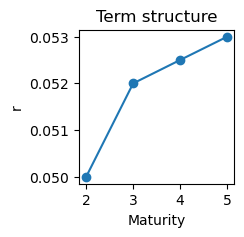

 b.The term structure is upward
 c. The yield on a coupon bonf in December 2025 would be higher than the yield on the 2022 strip


In [71]:
years = np.arange(2022, 2026)
t = np.arange(2, 6)
CF = 1000
PVs = np.array([0.90703, 0.85892, 0.81491, 0.77243])*CF #shape (4,)
rs = (CF/PVs)**(1/t) -1

np.set_printoptions(precision=4, suppress=True)  # 4 decimales, sin notación científica

print(" a.The annually compounded spot interest rate for each year is", rs*100)

plt.figure(figsize=(2,2))
plt.plot(t, rs, marker = "o")
plt.title("Term structure")
plt.xlabel("Maturity")
plt.ylabel("r")
plt.xticks(t)
plt.show()

print(" b.The term structure is upward")


print(" c. The yield on a coupon bonf in December 2025 would be higher than the yield on the 2022 strip")





# 27. Term-structure theories (S3.4) 
The one-year spot interest rate is r1 = 5% and the two-year
rate is r2 = 6%. If the expectations theory is correct, what is the expected one-year interest
rate in one year’s time?

In [77]:
rs = np.array([0.05, 0.06])

#if the expectation theory is correct then , the return for investing for 2 years directly should 
# equal the return from rolling over 1-year investments

# (1 + r2 )**2 = (1 + r1) ( 1 + f2)
#( 1 + 0.06)**2 = ( 1 + 0.05)*(1 + f2)

f2 = (( 1 + 0.06)**2 )/ ( 1 + 0.05) - 1 

np.set_printoptions(precision=4, suppress=True)  # 4 decimales, sin notación científica
print("The expected one-year interest rate in one year's time is :", round(f2*100,2), "%")


The expected one-year interest rate in one year's time is : 7.01 %


# 28. Term-structure theories (S3.4) 
Look again at the spot interest rates shown in Problem 24.   
What can you deduce about the one-year spot interest rate in three years if:  
a. The expectations theory of term structure is right?  
b. Investing in long-term bonds carries additional risks?  

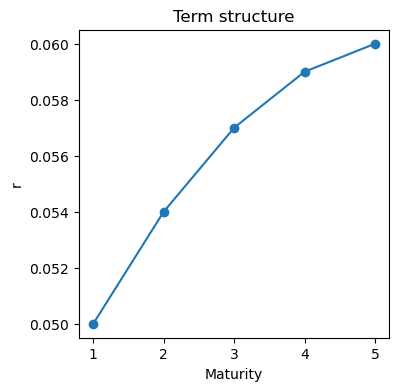

The one-year spot interest rate in three years would be :  0.06502273442637851


In [11]:
years = np.arange(1, 6) #shape (5,)
spot_rates = np.array([0.05, 0.054, 0.057, 0.059, 0.06])  

plt.figure(figsize = (4, 4))
plt.plot(years, spot_rates, marker = "o")
plt.title("Term structure")
plt.xlabel("Maturity")
plt.ylabel("r")
plt.show()

#if the expectations theory of term structure term is right then:
# (1 + r4)**4 = (1 + r3)**3 * (1 + f3.1)
#f3 = ((1 + r4)**4)/(1 + r3)**3 -1

f3 = ((1 + 0.059)**4)/((1 + 0.057)**3)  -1 

print("The one-year spot interest rate in three years would be : ", f3 )
print("The term structure curve is upward then the cashflows at longer maturity will be",
"discounted by a greaater factor so yes the  ")

# 29. Real interest rates (S3.5) 
The two-year interest rate is 10% and the expected annual inflation rate is 5%.  
a. What is the expected real interest rate?  
b. If the expected rate of inflation suddenly rises to 7%, what does Fisher’s theory say about
how the real interest rate will change? What about the nominal rate?  

In [13]:
r_nominal = 0.10
r_inflation = 0.05
t = 2

#real cash flow at date t
r_real = (1 + r_nominal)/(1 + r_inflation) -1

np.set_printoptions(precision=2, suppress=True)  # 4 decimales, sin notación científica
print("The expected real interest rate is : ", r_real)

#1 + r_nominal = (1 + r_real)*(  1 + 0.07)
r_nominal = (1 + r_real)*( 1 + 0.07) -1

print("If the expected rate of inflation rises to 7% then the real interest rate will not change",
     "but the nominal interest rate does. The new nominal rate is ", r_nominal)

The expected real interest rate is :  0.04761904761904767
If the expected rate of inflation rises to 7% then the real interest rate will not change but the nominal interest rate does. The new nominal rate is  0.12095238095238114


# 30. Nominal and real returns (S3.5) 
Suppose that you buy a two-year 8% bond at its face value.  
a. What will be your total nominal return over the two years if inflation is 3% in the first
year and 5% in the second? What will be your total real return?  
b. Now suppose that the bond is a TIPS. What will be your total two-year real and nominal
returns?  

In [43]:
maturity_years = 2
face_value = 100
pv_bond = 100
coupon_rate = 0.08



#Hallar retorno  nominal de un bono
cashflows = np.full(2,coupon_rate*face_value)
cashflows[maturity_years -1] += face_value 

nominal_rate_return = cashflows.sum()/face_value -1

print(cashflows)
print(f"The nominal return rate is : {nominal_rate_return:.2%}")

#Hallar retorno real de un bono
cumulate_inflation_rate = (1 + 0.03)*(1 + 0.05)  # 1 + inflation_rate(2años)

real_rate_return = (1 + nominal_rate_return)/(cumulate_inflation_rate) -1 

print(f"The real return rate is : {real_rate_return:.2%}")


[  8. 108.]
The nominal return rate is : 16.00%
The real return rate is : 7.26%
